In [1]:
import annealing as an
import zad2_cost_functions as cf
import plotly.express as px
import numpy as np

### Binary images

In [2]:
# Generate a random binary image of size n x n.
# Density specifies how many 'ones' we have in the image.
n = 100
density = 0.2
A = np.random.uniform(0, 1, size=(n, n))> (1-density)

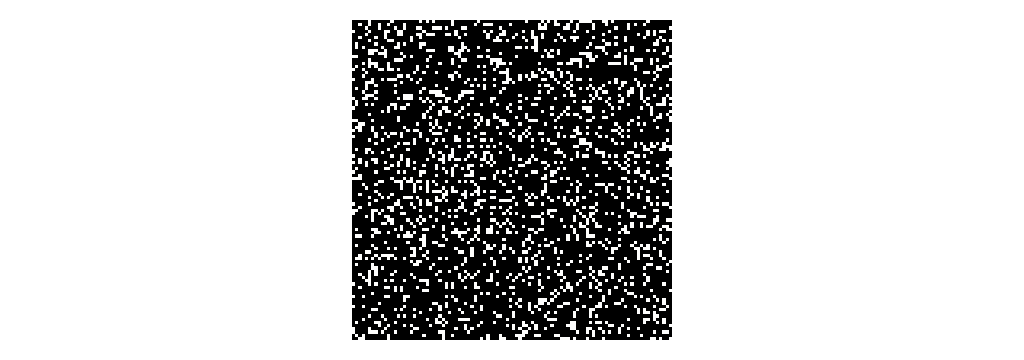

In [3]:
# Plot. 'Ones' are white.
def plot(A):
    fig = px.imshow(A, color_continuous_scale='gray')
    fig.update_layout(coloraxis_showscale=False,
                     margin=dict(l=50, r=50, t=20, b=20))
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    return fig
plot(A)

In [4]:
# Random swap of some points. Temperature increases number of points swapped.
def swap(A, T):
    A = np.copy(A)
    n_pts = int(20 + 2*T)
    pts = np.random.randint(len(A), size=(2,n_pts))
    x, y = np.unique(pts, axis=1)
    per = np.random.permutation(len(x))
    A[x,y] = A[x[per],y[per]]
    return A

#### Annealing example 1
Penalizes difference in neighbouring fields. Length 1 cross shaped.
``` 
  +  
+ o +
  +  
```

Starting...
0%, iter = 0, cost = 6374.0, T = 2000
10%, iter = 1000, cost = 6228.0, T = 735.39
20%, iter = 2000, cost = 6136.0, T = 270.4
30%, iter = 3000, cost = 5902.0, T = 99.42
40%, iter = 4000, cost = 5490.0, T = 36.56
50%, iter = 5000, cost = 4368.0, T = 13.44
60%, iter = 6000, cost = 3574.0, T = 4.94
70%, iter = 7000, cost = 3026.0, T = 1.82
80%, iter = 8000, cost = 2678.0, T = 0.67
90%, iter = 9000, cost = 2456.0, T = 0.25
100%, iter = 10000, cost = 2326.0, T = 0.09
Finished!


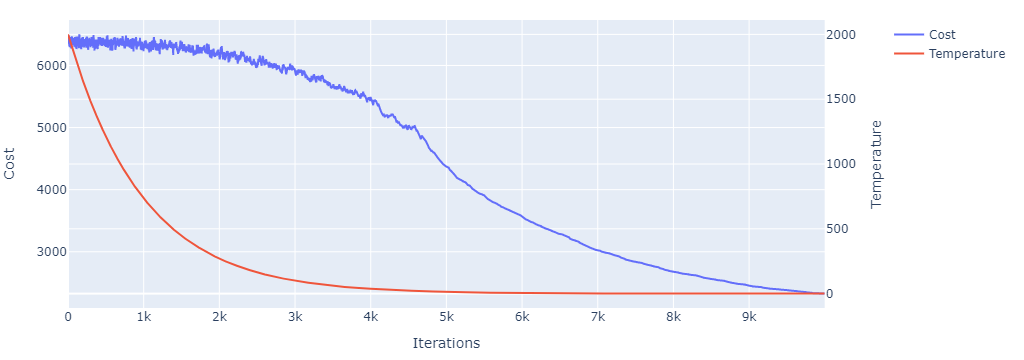

In [5]:
x, cost_hist, T_hist = an.anneal(
    x_0 = A,
    cost_fun = cf.cost1,
    update_fun = swap,
    T_change_fun = lambda T: T*0.997,
    iters=3000,
    verbose=True
)
assert A.sum() == x.sum() # Assure the process did not alter the number of 'ones'
an.plot_annealing(cost_hist, T_hist) # plot

##### Outcome
We can see that points form clusters to minimize the penalty. Although not too efficiently - one big cluster could do very well, but this technique has hard time approaching such result.

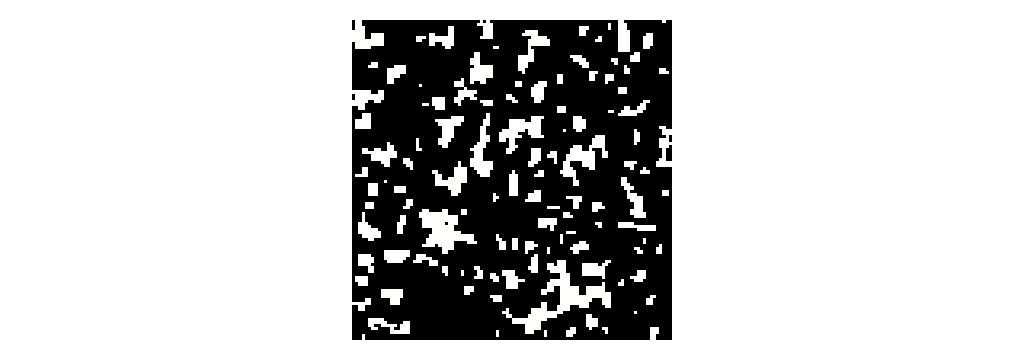

In [6]:
plot(x)

#### Example 2
Penalizes difference in horizontally neighbouring fields. 
Rewards difference in vertically neighbouring fields. 
Length 1 cross shaped.
```
  -   
+ o +
  -  
```

Starting...
0%, iter = 0, cost = -46.0, T = 2000
10%, iter = 300, cost = 50.0, T = 812.04
20%, iter = 600, cost = -126.0, T = 329.7
30%, iter = 900, cost = -250.0, T = 133.87
40%, iter = 1200, cost = -658.0, T = 54.35
50%, iter = 1500, cost = -1108.0, T = 22.07
60%, iter = 1800, cost = -1716.0, T = 8.96
70%, iter = 2100, cost = -2098.0, T = 3.64
80%, iter = 2400, cost = -2352.0, T = 1.48
90%, iter = 2700, cost = -2534.0, T = 0.6
100%, iter = 3000, cost = -2652.0, T = 0.24
Finished!


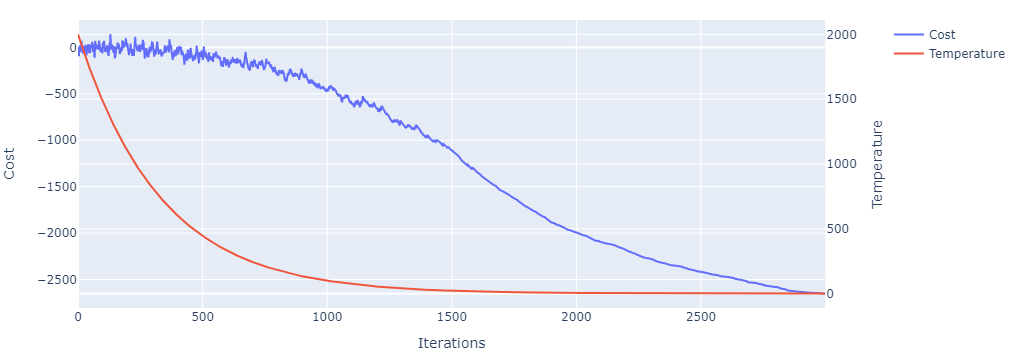

In [7]:
x, cost_hist, T_hist = an.anneal(
    x_0 = A,
    cost_fun = cf.cost2,
    update_fun = swap,
    T_change_fun = lambda T: T*0.997,
    iters=3000,
    verbose=False
)
assert A.sum() == x.sum() # Assure the process did not alter the number of 'ones'
an.plot_annealing(cost_hist, T_hist) # plot

#### Outcome
We can see that points form sort of horizontal lines. Cool.

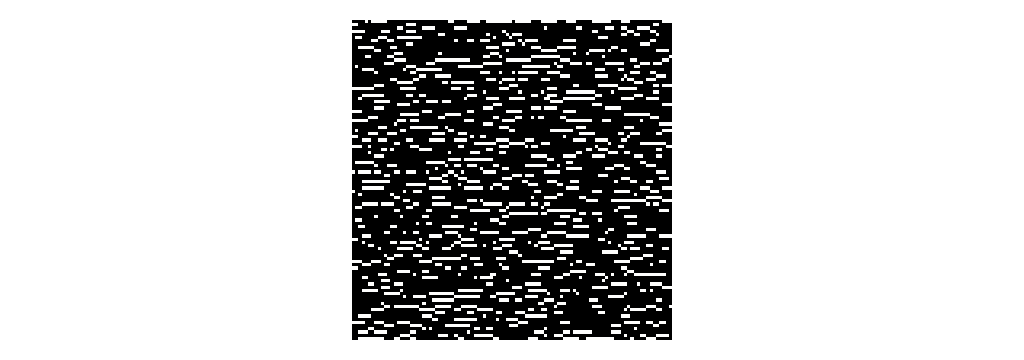

In [8]:
plot(x)

#### Example 3
Penalizes tight clustering. 
Length 1 box shaped. Applies to all fields.
```
+ + + 
+ o +
+ + +
```

Starting...
0%, iter = 0, cost = 45622.0, T = 2000
10%, iter = 300, cost = 45520.0, T = 812.04
20%, iter = 600, cost = 44596.0, T = 329.7
30%, iter = 900, cost = 43354.0, T = 133.87
40%, iter = 1200, cost = 41402.0, T = 54.35
50%, iter = 1500, cost = 39074.0, T = 22.07
60%, iter = 1800, cost = 37016.0, T = 8.96
70%, iter = 2100, cost = 36064.0, T = 3.64
80%, iter = 2400, cost = 35376.0, T = 1.48
90%, iter = 2700, cost = 35056.0, T = 0.6
100%, iter = 3000, cost = 34784.0, T = 0.24
Finished!


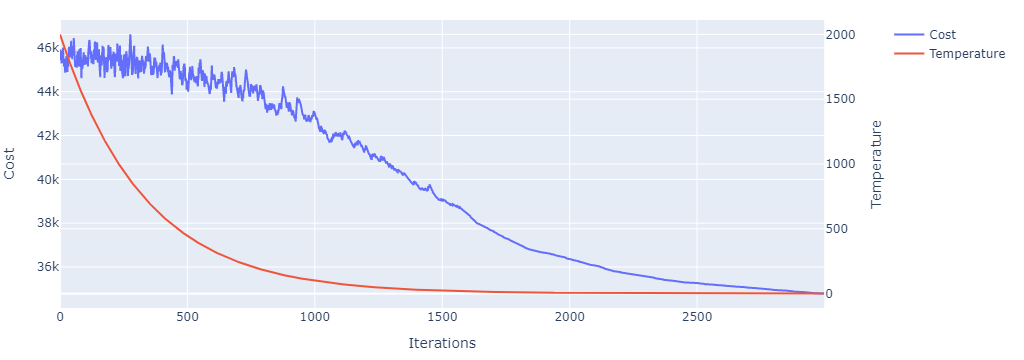

In [10]:
x, cost_hist, T_hist = an.anneal(
    x_0 = A,
    cost_fun = cf.cost3,
    update_fun = swap,
    T_change_fun = lambda T: T*0.997,
    iters=3000
)
assert A.sum() == x.sum() # Assure the process did not alter the number of 'ones'
an.plot_annealing(cost_hist, T_hist) # plot

##### Outcome
As expected, 'ones' are spread out very evenly to minimize grouping.

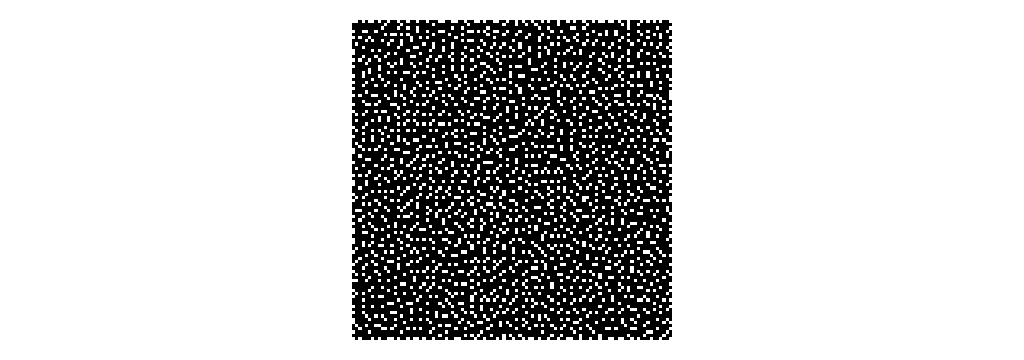

In [11]:
plot(x)

#### Example 4
Rewards diagonal chains harshly penalizes horizontal and vertical chains.
```
-   +   -
  - + -  
+ + o + +
  - + -  
-   +   -
```

Starting...
0%, iter = 0, cost = 4016.0, T = 2000
10%, iter = 300, cost = 4064.0, T = 812.04
20%, iter = 600, cost = 2986.0, T = 329.7
30%, iter = 900, cost = 2188.0, T = 133.87
40%, iter = 1200, cost = 956.0, T = 54.35
50%, iter = 1500, cost = -646.0, T = 22.07
60%, iter = 1800, cost = -2350.0, T = 8.96
70%, iter = 2100, cost = -3456.0, T = 3.64
80%, iter = 2400, cost = -4312.0, T = 1.48
90%, iter = 2700, cost = -4906.0, T = 0.6
100%, iter = 3000, cost = -5430.0, T = 0.24
Finished!


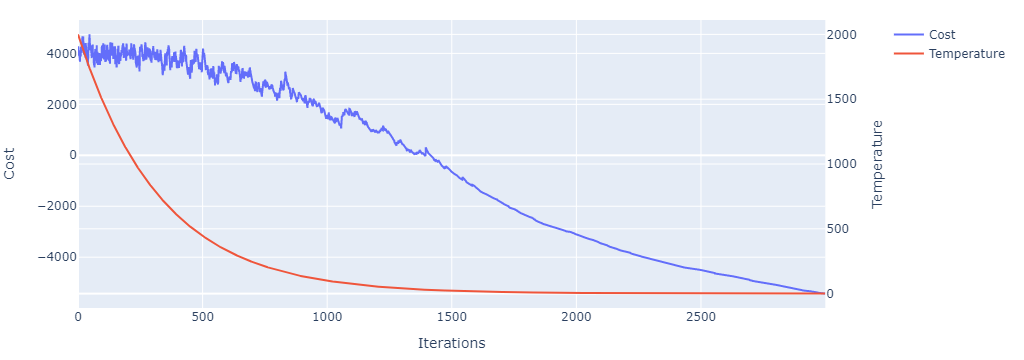

In [5]:
x, cost_hist, T_hist = an.anneal(
    x_0 = A,
    cost_fun = cf.cost4,
    update_fun = swap,
    T_change_fun = lambda T: T*0.997,
    iters=5000,
    verbose=False
)
assert A.sum() == x.sum() # Assure the process did not alter the number of 'ones'
an.plot_annealing(cost_hist, T_hist) # plot

#### Outcome
Clearly visible diagonal chains, great!
Having strong penalty for chaining in rows/columns and light reward for chaining diagonally makes the end result much clearer than
having aforementioned penalty and reward of equal strength. 

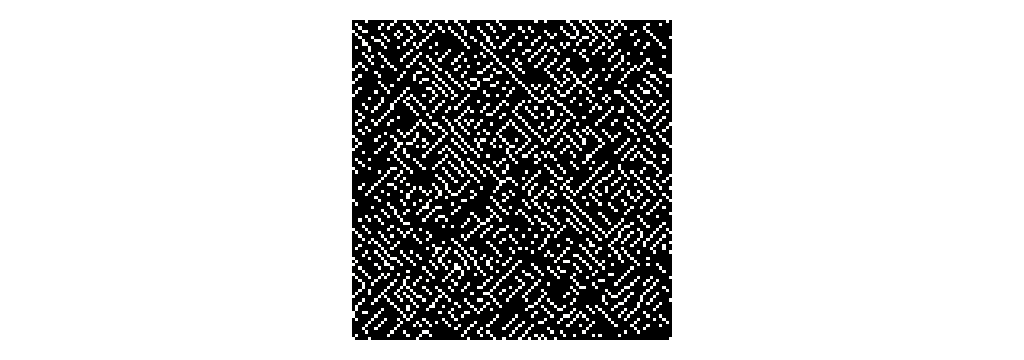

In [6]:
plot(x)

#### Example 5
Harshly penalizes close neighbours, rewards mid range neighbours.
```
- - - - -
- + + + - 
- + o + -
- + + + -
- - - - -
```

Starting...
0%, iter = 0, cost = 9740.0, T = 2000
10%, iter = 300, cost = 9148.0, T = 812.04
20%, iter = 600, cost = 8744.0, T = 329.7
30%, iter = 900, cost = 6132.0, T = 133.87
40%, iter = 1200, cost = 4686.0, T = 54.35
50%, iter = 1500, cost = 1502.0, T = 22.07
60%, iter = 1800, cost = -1188.0, T = 8.96
70%, iter = 2100, cost = -2992.0, T = 3.64
80%, iter = 2400, cost = -4210.0, T = 1.48
90%, iter = 2700, cost = -5116.0, T = 0.6
100%, iter = 3000, cost = -5742.0, T = 0.24
Finished!


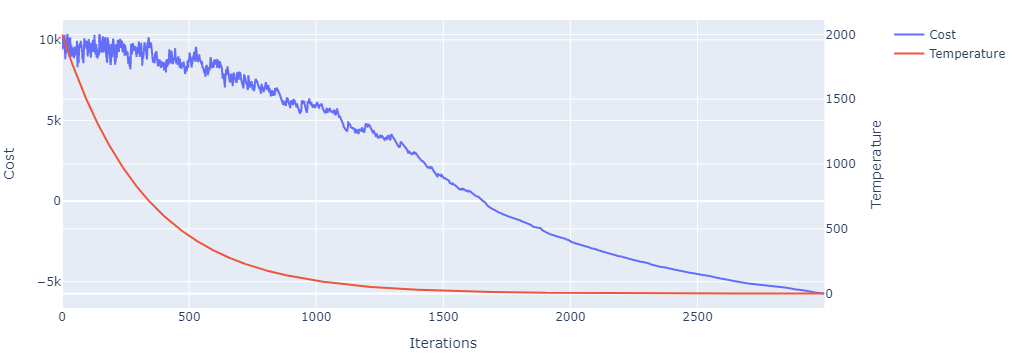

In [14]:
x, cost_hist, T_hist = an.anneal(
    x_0 = A,
    cost_fun = cf.cost5,
    update_fun = swap,
    T_change_fun = lambda T: T*0.997,
    iters=5000,
    verbose=False
)
assert A.sum() == x.sum() # Assure the process did not alter the number of 'ones'
an.plot_annealing(cost_hist, T_hist) # plot

#### Outcome
Points are spread out, but not so randomly.
The result differs from example 3 in the visible grid structure

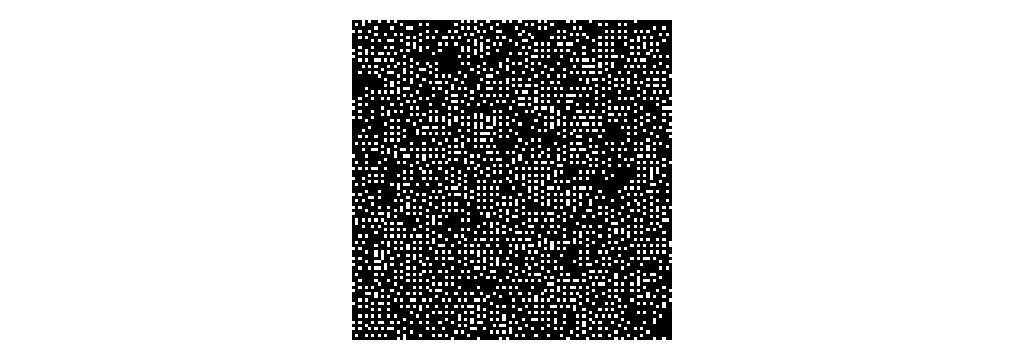

In [15]:
plot(x)

#### Example 6
This shape - not sure how to describe it.
```
  + - +  
-   +   - 
+ - o - +
-   +   -
  + - + 
```

Starting...
0%, iter = 0, cost = 394.0, T = 2000
10%, iter = 300, cost = 34.0, T = 812.04
20%, iter = 600, cost = -1632.0, T = 329.7
30%, iter = 900, cost = -2966.0, T = 133.87
40%, iter = 1200, cost = -5938.0, T = 54.35
50%, iter = 1500, cost = -9484.0, T = 22.07
60%, iter = 1800, cost = -16704.0, T = 8.96
70%, iter = 2100, cost = -23040.0, T = 3.64
80%, iter = 2400, cost = -28372.0, T = 1.48
90%, iter = 2700, cost = -33192.0, T = 0.6
100%, iter = 3000, cost = -37362.0, T = 0.24
Finished!


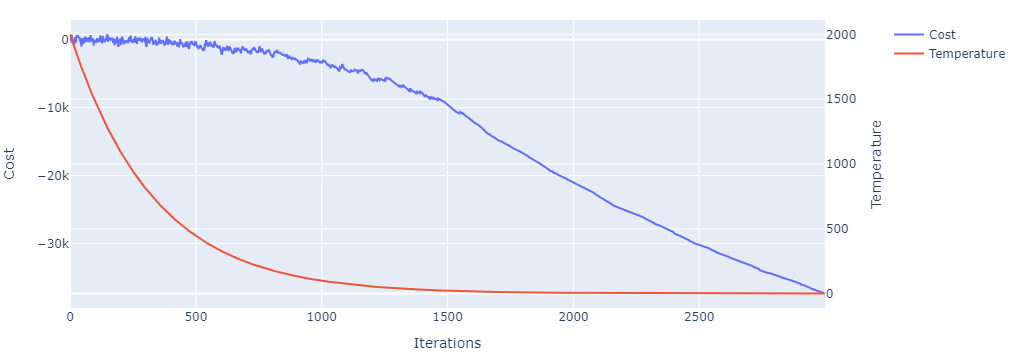

In [18]:
x, cost_hist, T_hist = an.anneal(
    x_0 = A,
    cost_fun = cf.cost6,
    update_fun = swap,
    T_change_fun = lambda T: T*0.997,
    iters=5000,
    verbose=False
)
assert A.sum() == x.sum() # Assure the process did not alter the number of 'ones'
an.plot_annealing(cost_hist, T_hist) # plot

#### Outcome
We can observe checkboard-like structure, although it is more complex.

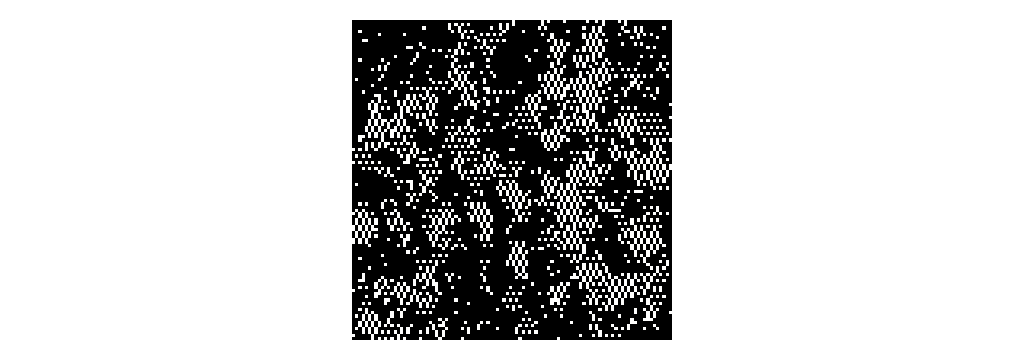

In [19]:
plot(x)